# Group Assignment
## Members: Yang LI, Hemin HE, Yun LI, Yi LIANG, Xiaoyi HAO, Yuwen CHE

## Exercise 1 (Method 2)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import numba 

In [30]:
S = 20
p = 0.5
c = 0.5

In [31]:
def ϕ():                         # Get a sample of demand from the distribution
    return np.random.geometric(p) - 1

In [32]:
def inventory(x,D_,s):           # Inventory
    if x <= s:
        return max(S - D_, 0)
    else:
        return max(x - D_, 0)

In [33]:
def h_s(x, s):                   # Stock on hand
    if x <= s:
        return S
    else:
        return x

In [34]:
def π(x, D_, s):
    if x <= s:
        return min (h_s(x, s),D_) - c
    else:
        return min (h_s(x, s),D_)

In [35]:
@numba.jit
def π_average(s, x0 = 0, n = 100_000):
    x = x0
    D = ϕ()
    q = np.zeros(n)
    q[0] = x0
    for i in range(n-1):
        q[i+1] = π(x, D, s = s)
        x_ = inventory(x, D, s)
        D = ϕ()   # D3
        x = x_   # X2
    return q.mean()

In [36]:
π_average(10, x0 = 0)

0.95513000000000003

In [37]:
πa = np.zeros(200)
for i in range(200):
    πa[i] = π_average(i/10, x0 = 0)

#print(πa)

The maximum of average profit can be achieved at s =   7.24
The maximum of average profit is 0.97976


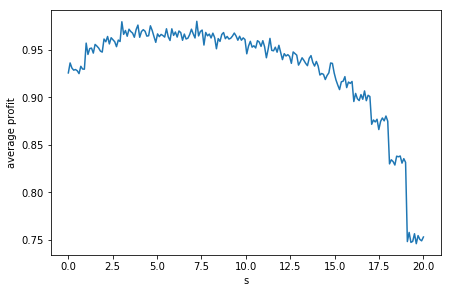

In [38]:
fig, ax = plt.subplots(figsize=(7, 4.5))
s = np.linspace(0,20,200)
ax.plot(s,πa)
ax.set(ylabel='average profit', xlabel='s')
print('The maximum of average profit can be achieved at s =  ',round(s[πa.argmax()],2))
print('The maximum of average profit is', πa.max())
plt.show()